### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut
from scipy import stats

import pymannkendall as mk

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:
def make_yearlist_UKESM(yrst, yrend, scen = '1A'):
    
    baseDir = '//gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'

    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/UKESM_{scen}_y{yrs[i]}_wspd10m_seas_rg.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist



In [5]:
scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'runid':'TOM12_TJ_1AA1'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'runid':'TOM12_TJ_1BA1'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'runid':'TOM12_TJ_2AA1'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'runid':'TOM12_TJ_2BA1'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'runid':'TOM12_TJ_3AA1'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'runid':'TOM12_TJ_3BA1'},
    'PI': {
        'hist_str': '',
        'fut_str': '',
        'name': 'PI OZONE \n PI TEMP.',
        'name2':'PI: OzonePI-PI',
        'color':'silver',
        'runid':'TOM12_TJ_PIA1'}
}


In [6]:
# t_2B = xr.open_mfdataset(make_yearlist_UKESM(2070, 2072, scen = '2B'))
# t_2A = xr.open_mfdataset(make_yearlist_UKESM(2070, 2072, scen = '2A'))

# t_2A.wspd10m[10,100,100].values
#t_2B.wspd10m[12,100,100]
bdi = '/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'
t_2A = xr.open_dataset(f'{bdi}UKESM_2A_y2090m12_wspd10m_daily_rg.nc')
t_2B = xr.open_dataset(f'{bdi}UKESM_2B_y2090m12_wspd10m_daily_rg.nc')

print(t_2B.wspd10m[0,120,100])
print(t_2A.wspd10m[0,120,100])

<xarray.DataArray 'wspd10m' ()>
array(1.250408, dtype=float32)
Coordinates:
    lon      float64 100.0
    lat      float64 30.5
    day      int64 331
<xarray.DataArray 'wspd10m' ()>
array(0.943902, dtype=float32)
Coordinates:
    lon      float64 100.0
    lat      float64 30.5
    day      int64 331


In [7]:
savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
cdomask = xr.open_dataset(savenam)
tmask = cdomask.tmask

extract = False


if extract:
    
    ylist_UKESM_1A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '1A'))
    ylist_UKESM_2A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '2A'))
    ylist_UKESM_3A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '3A'))
    ylist_UKESM_1B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '1B'))
    ylist_UKESM_2B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '2B'))
    ylist_UKESM_3B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '3B'))
    ylist_UKESM_PI = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, 'PI'))

    savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
    cdomask = xr.open_dataset(savenam)
    tmask = cdomask.tmask
    
    t1 = 1950; t2 = 2101
    baseDir = '//gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'

    test = ylist_UKESM_1A.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_1A_wspd10m_overwater-50S-mean.nc')

    test = ylist_UKESM_2A.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_2A_wspd10m_overwater-50S-mean.nc')

    test = ylist_UKESM_3A.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_3A_wspd10m_overwater-50S-mean.nc')
    ##
    test = ylist_UKESM_1B.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_1B_wspd10m_overwater-50S-mean.nc')

    test = ylist_UKESM_2B.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_2B_wspd10m_overwater-50S-mean.nc')

    test = ylist_UKESM_3B.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_3B_wspd10m_overwater-50S-mean.nc')

    test = ylist_UKESM_PI.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
    test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
    .mean(dim = ['lat', 'lon'])
    test3 = test2.to_dataset(name = 'wspd10m')
    test3.attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb'}
    test3.to_netcdf(f'{baseDir}/UKESM_PI_wspd10m_overwater-50S-mean.nc')

In [8]:
baseDir = '//gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'

wspd_PI = xr.open_dataset(f'{baseDir}/UKESM_PI_wspd10m_overwater-50S-mean.nc')
wspd_1A = xr.open_dataset(f'{baseDir}/UKESM_1A_wspd10m_overwater-50S-mean.nc')
wspd_2A = xr.open_dataset(f'{baseDir}/UKESM_2A_wspd10m_overwater-50S-mean.nc')
wspd_3A = xr.open_dataset(f'{baseDir}/UKESM_3A_wspd10m_overwater-50S-mean.nc')
wspd_1B = xr.open_dataset(f'{baseDir}/UKESM_1B_wspd10m_overwater-50S-mean.nc')
wspd_2B = xr.open_dataset(f'{baseDir}/UKESM_2B_wspd10m_overwater-50S-mean.nc')
wspd_3B = xr.open_dataset(f'{baseDir}/UKESM_3B_wspd10m_overwater-50S-mean.nc')

In [9]:
wspd_1A

<xarray.Dataset>
Dimensions:       (time_counter: 604)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1950-01-15 ... 2100-10-15
Data variables:
    wspd10m       (time_counter) float64 ...
Attributes:
    made in:  SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


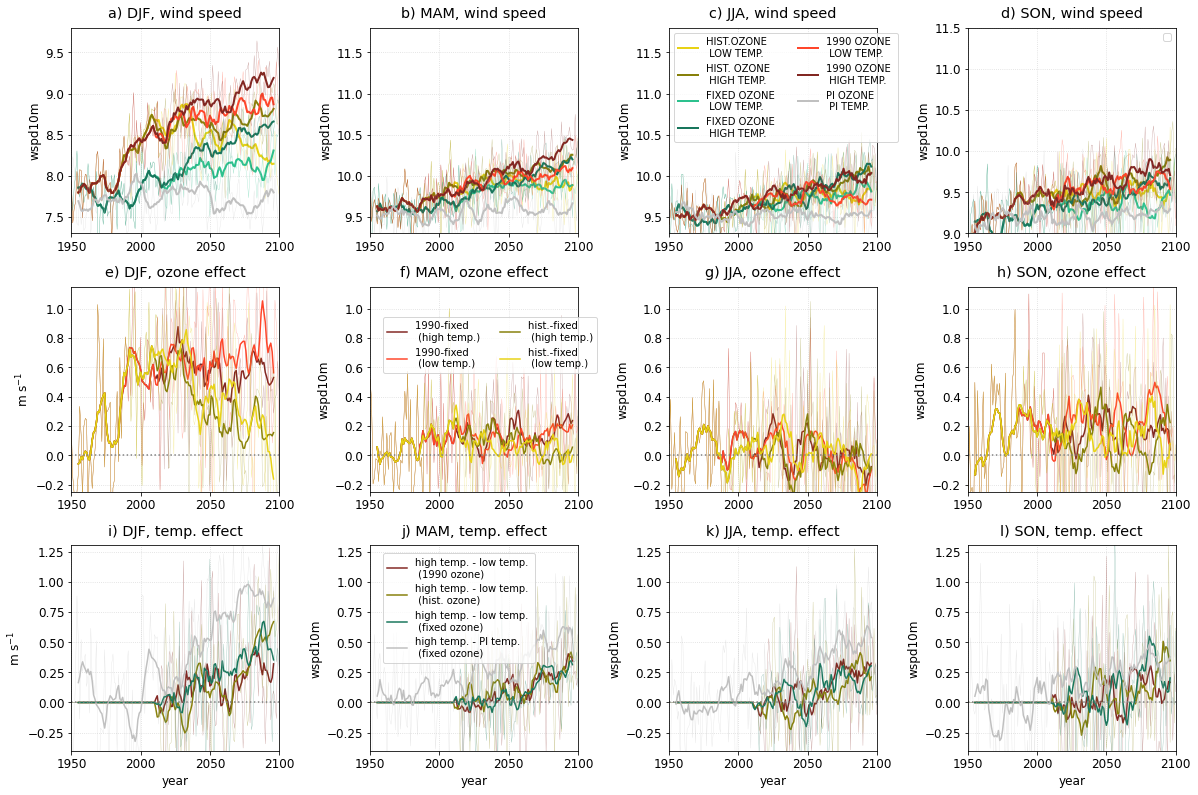

In [10]:
tlw = 1.5
tlw2 = 0.3 #linewidth
fact = 1.4
ypos = 1.02
fs2 = 10

fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

#####
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B, wspd_PI]
scens = ['1A', '1B', '2A', '2B', '3A', '3B','PI']

for x in range(0,7):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
ymi = [7.3, 9.3, 9.3, 9.0]
tits = ['a) DJF, wind speed','b) MAM, wind speed','c) JJA, wind speed','d) SON, wind speed']
for i in range(0,4):
    axs[i].set_title(tits[i], y = ypos)
    axs[i].set_xlim([1950,2100])
    axs[2].legend(loc = 'upper left', ncol = 2, fontsize = fs2)
    #axs[3].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)
    axs[3].legend(bbox_to_anchor = (1,1), ncol = 2, fontsize = 10)
    axs[i].set_ylim([ymi[i], ymi[i]+2.5])

    axs[i].set_xlabel('')


##### ozone effect
ind = 4
wspdset = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1B-wspd_2B), (wspd_1A-wspd_2A)]
scens = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
cols = ['k','grey']
cols = ['#822722', '#FF462B', '#87800A', '#E8D215']


for x in range(0,4):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
tits = ['e) DJF, ozone effect','f) MAM, ozone effect','g) JJA, ozone effect','h) SON, ozone effect']

for i in range(0+ind,4+ind):
    axs[i].set_title(tits[i-ind], y = ypos)
    axs[0+ind].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1950,2100])
    axs[1+ind].legend(loc = (0.06, 0.58), ncol = 2, fontsize = fs2)
    axs[i].set_ylim([-0.25,1.15])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')
    axs[i].set_xlabel('')

#### temperature effect
ind = 8
wspdset = [(wspd_3B-wspd_3A), (wspd_1B-wspd_1A), (wspd_2B-wspd_2A), (wspd_2B-wspd_PI)]
cols = [scendict['3B']['color'],scendict['1B']['color'],scendict['2B']['color'], 'silver']
scens = ['high temp. - low temp. \n (1990 ozone)', 'high temp. - low temp. \n (hist. ozone)',
         'high temp. - low temp. \n (fixed ozone)', 'high temp. - PI temp. \n (fixed ozone)' ]
for x in range(0,4):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw, alpha = 1)

tits = ['i) DJF, temp. effect','j) MAM, temp. effect','k) JJA, temp. effect','l) SON, temp. effect']
for i in range(0+ind,4+ind):

    axs[i].set_title(tits[i-ind], y = ypos)
    axs[0+ind].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1950,2100])
    axs[1+ind].legend(loc = (0.06, 0.43), fontsize = fs2)
    axs[i].set_ylim([-0.4,1.3])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')

for i in range(0,12):
    axs[i].grid(color = 'grey', linestyle = ':', alpha = 0.3)

tsp = 0.22
plt.subplots_adjust(wspace=tsp, hspace=tsp)
plt.tight_layout()
fig.savefig('./figs/Fig-wspdcombined.jpg')
# plt.savefig("./figs/Fig-wspdcombined.jpg",
#                bbox_inches='tight', 
#                transparent=True,
#                pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


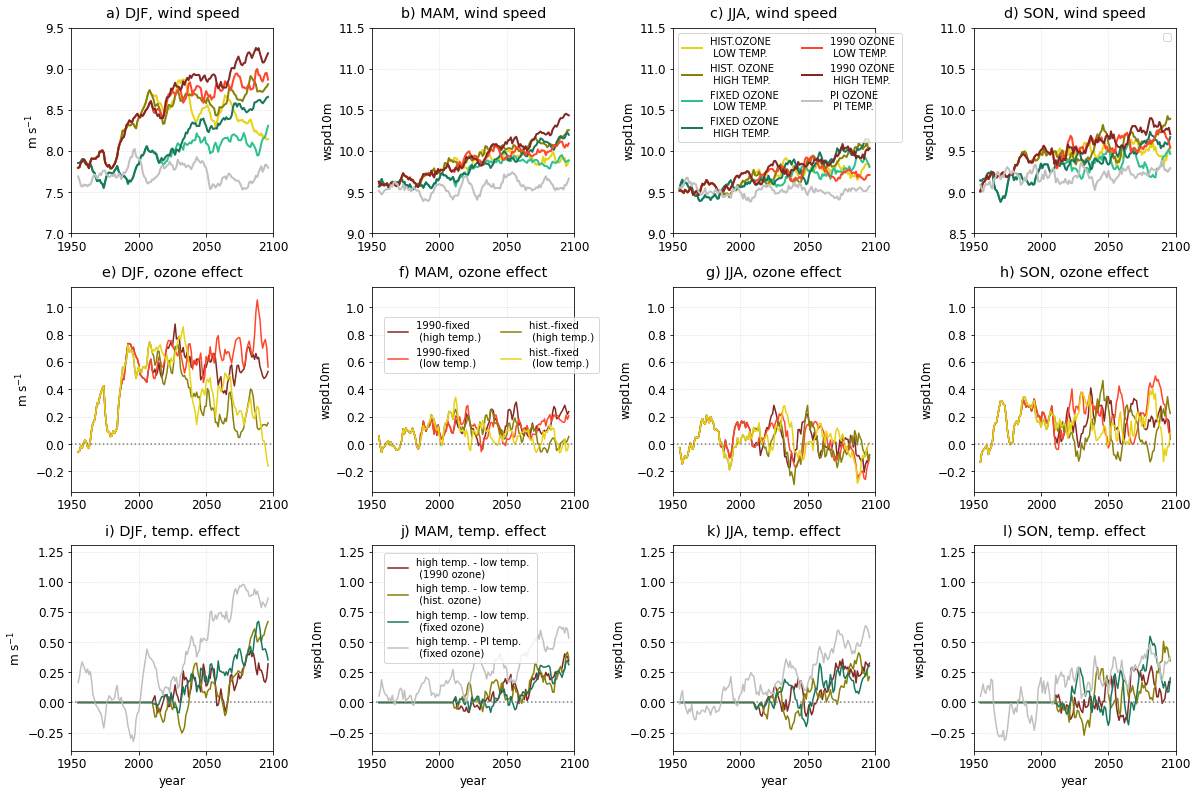

In [11]:
tlw = 1.5
tlw2 = 0.3 #linewidth
fact = 1.4
ypos = 1.02
fs2 = 10

fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

#####
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B, wspd_PI]
scens = ['1A', '1B', '2A', '2B', '3A', '3B','PI']

for x in range(0,7):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
ymi = [7.0, 9, 9, 8.5]
tits = ['a) DJF, wind speed','b) MAM, wind speed','c) JJA, wind speed','d) SON, wind speed']
for i in range(0,4):
    axs[i].set_title(tits[i], y = ypos)
    axs[0].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1950,2100])
    axs[2].legend(loc = 'upper left', ncol = 2, fontsize = fs2)
    #axs[3].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)
    axs[3].legend(bbox_to_anchor = (1,1), ncol = 2, fontsize = 10)
    axs[i].set_ylim([ymi[i], ymi[i]+2.5])

    axs[i].set_xlabel('')


##### ozone effect
ind = 4
wspdset = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1B-wspd_2B), (wspd_1A-wspd_2A)]
scens = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
cols = ['k','grey']
cols = ['#822722', '#FF462B', '#87800A', '#E8D215']


for x in range(0,4):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
tits = ['e) DJF, ozone effect','f) MAM, ozone effect','g) JJA, ozone effect','h) SON, ozone effect']

for i in range(0+ind,4+ind):
    axs[i].set_title(tits[i-ind], y = ypos)
    axs[0+ind].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1950,2100])
    axs[1+ind].legend(loc = (0.06, 0.58), ncol = 2, fontsize = fs2)
    axs[i].set_ylim([-0.35,1.15])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')
    axs[i].set_xlabel('')

#### temperature effect
ind = 8
wspdset = [(wspd_3B-wspd_3A), (wspd_1B-wspd_1A), (wspd_2B-wspd_2A), (wspd_2B-wspd_PI)]
cols = [scendict['3B']['color'],scendict['1B']['color'],scendict['2B']['color'], 'silver']
scens = ['high temp. - low temp. \n (1990 ozone)', 'high temp. - low temp. \n (hist. ozone)',
         'high temp. - low temp. \n (fixed ozone)', 'high temp. - PI temp. \n (fixed ozone)' ]
for x in range(0,4):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
    tv = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw, alpha = 1)

tits = ['i) DJF, temp. effect','j) MAM, temp. effect','k) JJA, temp. effect','l) SON, temp. effect']
for i in range(0+ind,4+ind):

    axs[i].set_title(tits[i-ind], y = ypos)
    axs[0+ind].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1950,2100])
    axs[1+ind].legend(loc = (0.06, 0.43), fontsize = fs2)
    axs[i].set_ylim([-0.4,1.3])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')

for i in range(0,12):
    axs[i].grid(color = 'grey', linestyle = ':', alpha = 0.3)

tsp = 0.22
plt.subplots_adjust(wspace=tsp, hspace=tsp)
plt.tight_layout()
fig.savefig('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperJPG/Fig-windlines.jpg')
# plt.savefig("./figs/Fig-wspdcombined.jpg",
#                bbox_inches='tight', 
#                transparent=True,
#                pad_inches=0.1)

### wind speed decomposition, better

In [12]:
wspd_1A_50 = wspd_1A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


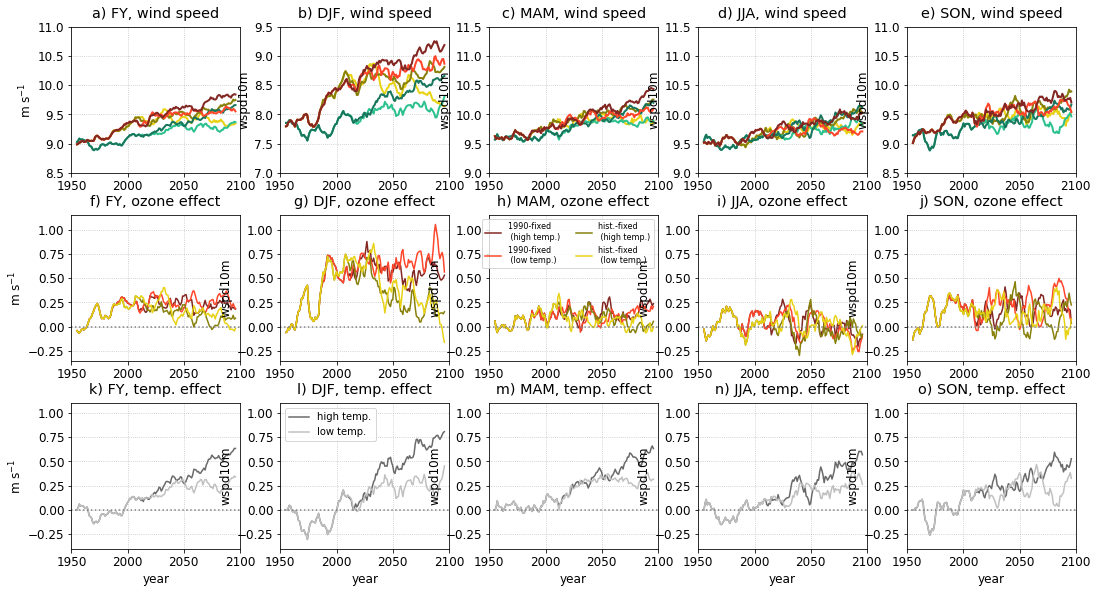

In [13]:
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

tlw = 1.5
tlw2 = 0.3 #linewidth
fact = 1.2
ypos = 1.02
fs2 = 10
var = 'wspd10m'; vardesc = 'wind speed'; ylab = 'm s$^{-1}$'

fig, axs = plt.subplots(3,5, figsize=(15*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


# #####
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

wspd_2A_50 = wspd_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
wspd_2B_50 = wspd_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

wspdset_o3 = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1B-wspd_2B), (wspd_1A-wspd_2A)]
scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']

#wspdset_t = [(wspd_2B-wspd_2B_50), (wspd_2A-wspd_2A_50)]
cols_t = ['dimgrey', 'silver']
scens_t = ['high temp.','low temp.']

for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
      
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[4], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
#axs[3].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)

##### ozone effect
ind = 5
for x in range(0,4):
    tsc = scens_o3[x]
    wspd = wspdset_o3[x]
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])    
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols_o3[x], linewidth = tlw, alpha = 1)
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[4+ind], color = cols_o3[x], linewidth = tlw, alpha = 1)
    
#### temperature effect
ind = 10
tv = wspd_2B[var].groupby('time_counter.year').mean()-\
wspd_2B_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[0+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[1+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'MAM')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])
    
tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'JJA')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[3+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'SON')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[4+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])    
    
tv = wspd_2A[var].groupby('time_counter.year').mean()-\
wspd_2A_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[0+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[1+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'MAM')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])
    
tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'JJA')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[3+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'SON')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[4+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])  
###low T

for i in range(0,15):
    axs[i].grid(color = 'grey', linestyle = ':', alpha = 0.5)
    

### effect
ymi = [8.5, 7.0, 9, 9, 8.5]
tits0 = [f'a) FY, {vardesc}',f'b) DJF, {vardesc}',f'c) MAM, {vardesc}',\
        f'd) JJA, {vardesc}',f'e) SON, {vardesc}']
for i in range(0,5):
    axs[i].set_title(tits0[i], y = ypos)
    axs[i].set_xlim([1950,2100])
    #axs[2].legend(loc = 'upper left', ncol = 2, fontsize = fs2)
    #axs[3].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)
    #axs[3].legend(bbox_to_anchor = (1,1), ncol = 2, fontsize = 10)
    axs[i].set_ylim([ymi[i], ymi[i]+2.5])
    axs[i].set_xlabel('')
    
tits = ['f) FY, ozone effect', 'g) DJF, ozone effect','h) MAM, ozone effect',\
        'i) JJA, ozone effect','j) SON, ozone effect']
ind = 5; ymi = -0.35; yma = 1.15
for i in range(0+ind,5+ind):
    axs[i].set_title(tits[i-ind], y = ypos)
    axs[i].set_xlim([1950,2100])
    axs[2+ind].legend(loc = 'upper right', ncol = 2, fontsize = fs2-2)
    axs[i].set_ylim([ymi,yma])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')
    axs[i].set_xlabel('')
    
ind = 10; ymi = -0.4; yma = 1.1
tits1 = ['k) FY, temp. effect', 'l) DJF, temp. effect','m) MAM, temp. effect',\
        'n) JJA, temp. effect','o) SON, temp. effect']
for i in range(0+ind,5+ind):
    
    axs[i].set_title(tits1[i-ind], y = ypos)
    axs[i].set_xlim([1950,2100])
    axs[1+ind].legend(loc = 'upper left', fontsize = fs2)
    axs[i].set_ylim([ymi,yma])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')
    
axs[0].set_ylabel(f'{ylab}')
axs[5].set_ylabel(f'{ylab}')
axs[10].set_ylabel(f'{ylab}')
    
    
    
tsp = 0.24
plt.subplots_adjust(wspace=tsp, hspace=tsp+0.05)
#plt.tight_layout()
##fig.savefig('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperJPG/Fig-windlines.jpg')
# plt.savefig("./figs/Fig-wspdcombined.jpg",
#                bbox_inches='tight', 
#                transparent=True,
#                pad_inches=0.1)

In [14]:
def get_effect_ozone(sc1,sc2,dec1=1950, dec2=2090,var = 'wspd10m', seas = 'FY'):

    ##for warming just have 
    sc = sc1 - sc2
    
    if seas == 'FY':
        
        start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values
        end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values
        
    else:
        
        start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01'))
        start = start.sel(time_counter=(start['time_counter.season'] == seas)).\
        groupby('time_counter.year').mean().mean().values
        
        end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01'))
        end = end.sel(time_counter=(end['time_counter.season'] == seas)).\
        groupby('time_counter.year').mean().mean().values
    
    effect1 = end-start # the better one i think 
    effect2 = end
    
    return effect1, effect2

def get_effect_warming(sc1,dec1=1950, dec2=2090,var = 'wspd10m', seas = 'FY'):

    ##for warming just have 
    sc = sc1
    
    if seas == 'FY':
        
        start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values
        end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values

    else:
        
        start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01'))
        start = start.sel(time_counter=(start['time_counter.season'] == seas)).\
        groupby('time_counter.year').mean().mean().values
        
        end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01'))
        end = end.sel(time_counter=(end['time_counter.season'] == seas)).\
        groupby('time_counter.year').mean().mean().values
    
    effect1 = end-start # the better one i think 
    effect2 = end
    
    return effect1, effect2

e, e2 = get_effect_ozone(wspd_3A, wspd_2A, seas = 'JJA')
print(f'{e}, {e2}')
print()
e, e2 = get_effect_ozone(wspd_3B, wspd_2B)
print(f'{e}, {e2}')
e, e2 = get_effect_ozone(wspd_2B, wspd_2B)
print(f'{e}, {e2}')
# tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
# wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'SON')).mean().values    
    
    
# wspd_2A_50 = wspd_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
# wspd_2B_50 = wspd_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

-0.11576181694125277, -0.14231074737039381

0.22829772050189434, 0.18823764936406578
0.0, 0.0


In [15]:


e, e2 = get_effect_ozone(wspd_3A, wspd_2A, seas = 'JJA')
print(f'{e}, {e2}')
print()
e, e2 = get_effect_ozone(wspd_3B, wspd_2B)
print(f'{e}, {e2}')
e, e2 = get_effect_ozone(wspd_2B, wspd_2B)
print(f'{e}, {e2}')
# tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
# wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'SON')).mean().values    
    
    
# wspd_2A_50 = wspd_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
# wspd_2B_50 = wspd_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

-0.11576181694125277, -0.14231074737039381

0.22829772050189434, 0.18823764936406578
0.0, 0.0


In [16]:
dec1 = 1950
wspd_2A.wspd10m.sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values

array(9.02678089)

Text(0.5, 1.02, 'effects of warming and ozone evolution on wind speed, {2090-2100} relative to {1950-1960}')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


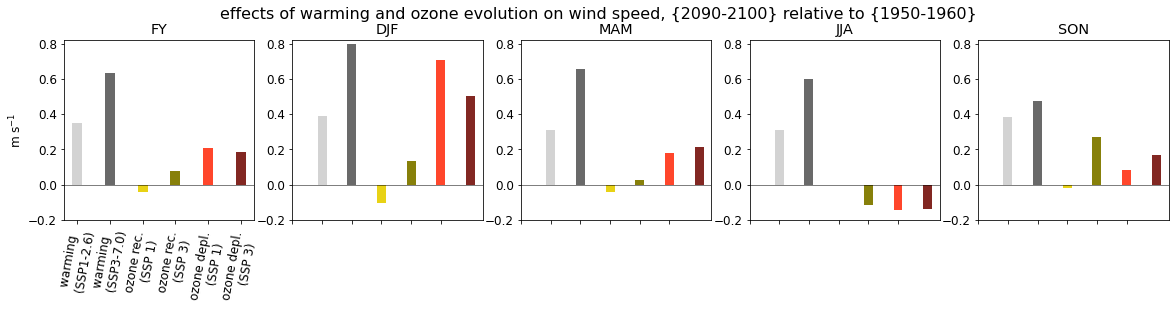

In [17]:
fact = 1.1; tw = 0.3
fig, axs = plt.subplots(1,5, figsize=(18*fact, 3*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0; tseas = 'FY'
def plot_effects(ind,tseas):
    e_wl, e2 = get_effect_warming(wspd_2A, seas = tseas)
    axs[ind].bar(1,e_wl, color = 'lightgrey',width=tw)
    e_wh, e2 = get_effect_warming(wspd_2B, seas = tseas)
    axs[ind].bar(2,e_wh, color = 'dimgrey',width=tw)
    e, e2 = get_effect_ozone(wspd_1A, wspd_2A, seas = tseas)
    axs[ind].bar(3,e2, color = scendict['1A']['color'],width=tw)
    e, e2 = get_effect_ozone(wspd_1B, wspd_2B, seas = tseas)
    axs[ind].bar(4,e2, color = scendict['1B']['color'],width=tw)
    e, e2 = get_effect_ozone(wspd_3A, wspd_2A, seas = tseas)
    axs[ind].bar(5,e2, color = scendict['3A']['color'],width=tw)
    e, e2 = get_effect_ozone(wspd_3B, wspd_2B, seas = tseas)
    axs[ind].bar(6,e2, color = scendict['3B']['color'],width=tw)

ind = 0; tseas = 'FY'
plot_effects(ind,tseas)
axs[ind].set_xticks(np.arange(1,7,1))
axs[ind].set_xticklabels(['warming \n(SSP1-2.6)', 'warming \n (SSP3-7.0)', 'ozone rec. \n (SSP 1)',\
                         'ozone rec. \n (SSP 3)','ozone depl. \n (SSP 1)','ozone depl. \n (SSP 3)'], rotation = 80)
ind = 1; tseas = 'DJF'
plot_effects(ind,tseas)
axs[ind].set_xticks(np.arange(0,6,1))
axs[ind].set_xticklabels(['','','','','','',], rotation = 60)
ind = 2; tseas = 'MAM'
plot_effects(ind,tseas)
axs[ind].set_xticks(np.arange(0,6,1))
axs[ind].set_xticklabels(['','','','','','',], rotation = 60)
ind = 3; tseas = 'JJA'
plot_effects(ind,tseas)
axs[ind].set_xticks(np.arange(0,6,1))
axs[ind].set_xticklabels(['','','','','','',], rotation = 60)
ind = 4; tseas = 'SON'
plot_effects(ind,tseas)
axs[ind].set_xticks(np.arange(0,6,1))
axs[ind].set_xticklabels(['','','','','','',], rotation = 60)

tits = ['FY','DJF','MAM','JJA','SON',]
for ind in range(0,5):
    axs[ind].axhline(y=0, color = 'k', linewidth = 0.5)
    axs[ind].set_ylim(-0.2,0.82)
    axs[ind].set_title(tits[ind])
axs[0].set_ylabel('m s$^{-1}$')
plt.suptitle('effects of warming and ozone evolution on wind speed, {2090-2100} relative to {1950-1960}', y = 1.02, fontsize = 16)


## combine bar graphs graphs with lines
https://stackoverflow.com/questions/27426668/row-titles-for-matplotlib-subplot

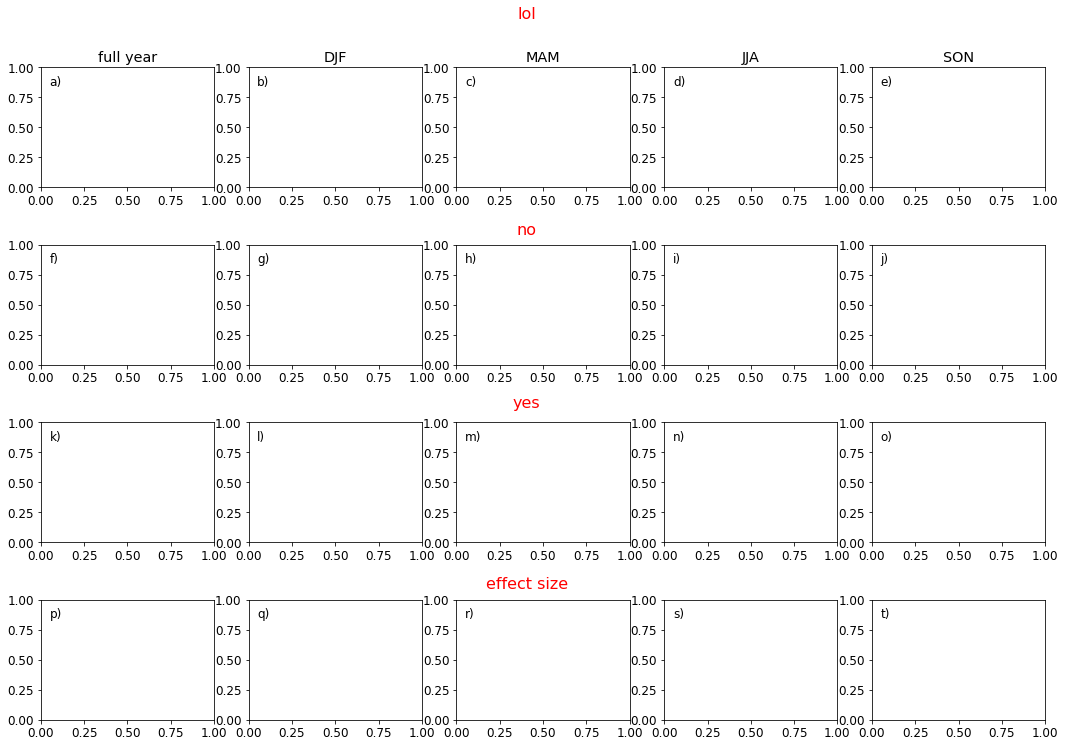

In [18]:
fact = 1
fig, axs = plt.subplots(4,5, figsize=(18*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace = 0.48 )
t1 = 'lol'
t2 = 'no'
t3 = 'yes'
t4 = 'effect size'
fs = 16

plt.figtext(0.5,0.95, t1, ha="center", va="top", fontsize=fs, color="r")
plt.figtext(0.5,0.70, t2, ha="center", va="top", fontsize=fs, color="r")
plt.figtext(0.5,0.5, t3, ha="center", va="top", fontsize=fs, color="r")
plt.figtext(0.5,0.29, t4, ha="center", va="top", fontsize=fs, color="r")

lab = ['a)','b)','c)','d)','e)','f)','g)','h)','i)','j)','k)','l)','m)','n)',\
      'o)','p)','q)','r)','s)','t)']
for i in range(0,20):
    axs[i].text(0.05,0.85, lab[i])

    tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])

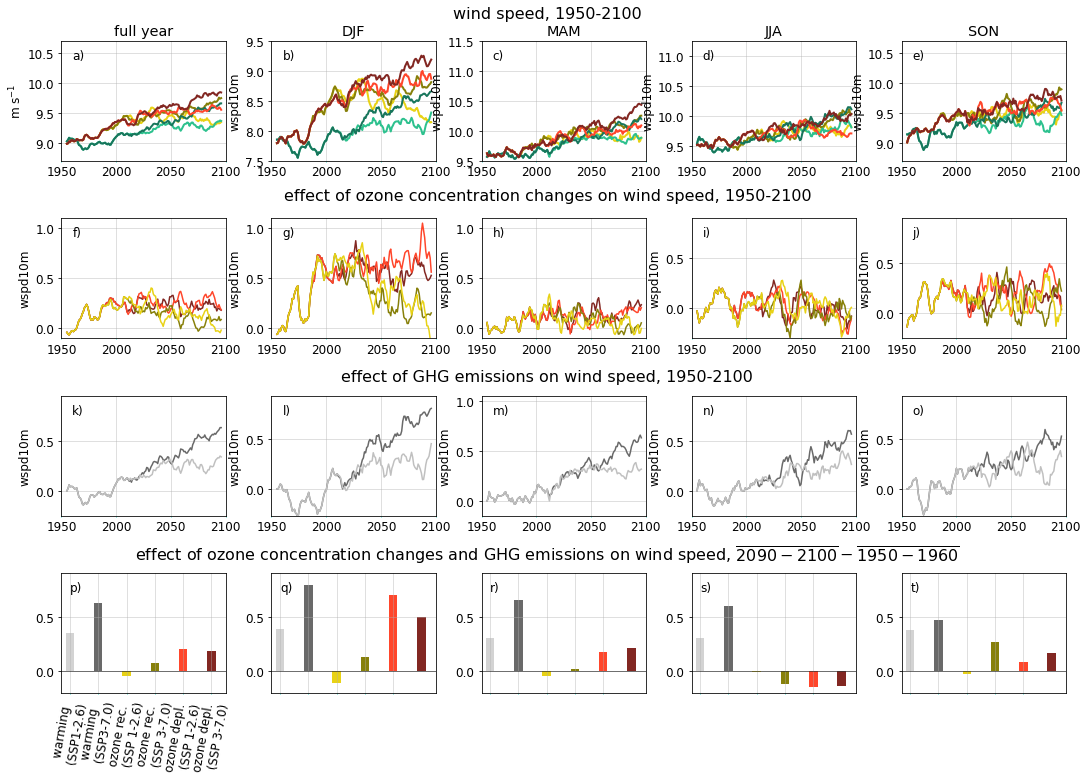

In [19]:
fact = 1
fig, axs = plt.subplots(4,5, figsize=(18*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

wspd_2A_50 = wspd_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
wspd_2B_50 = wspd_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

wspdset_o3 = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1B-wspd_2B), (wspd_1A-wspd_2A)]
scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
scens_o3 = ['ozone depl.-fixed ozone \n (SSP 3-7.0)', 'ozone depl.-fixed ozone \n (SSP 1-2.6)',\
            'ozone rec .-fixed ozone \n (SSP 3-7.0)', 'ozone rec .-fixed ozone \n (SSP 1-2.6)']

cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']
cols_t = ['dimgrey', 'silver']
scens_t = ['fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 3-7.0)',\
           'fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 1-2.6)']


############## lines
tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])

for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
      
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[4], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)

##########################
#### ozone effect

ind = 5
for x in range(0,4):
    tsc = scens_o3[x]
    wspd = wspdset_o3[x]
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])    
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols_o3[x], linewidth = tlw, alpha = 1)
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[4+ind], color = cols_o3[x], linewidth = tlw, alpha = 1)
    
######################
#### temperature effect
ind = 10
tv = wspd_2B[var].groupby('time_counter.year').mean()-\
wspd_2B_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[0+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[1+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'MAM')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])
    
tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'JJA')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[3+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'SON')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[4+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])    
    
tv = wspd_2A[var].groupby('time_counter.year').mean()-\
wspd_2A_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[0+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[1+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'MAM')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])
    
tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'JJA')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[3+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'SON')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[4+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])  
##############################################


    
### bar graph
ind = 15; tseas = 'FY'
plot_effects(ind,tseas)
axs[ind].set_xticks(np.arange(1,7,1))
axs[ind].set_xticklabels(['warming \n(SSP1-2.6)', 'warming \n (SSP3-7.0)', 'ozone rec. \n (SSP 1-2.6)',\
                         'ozone rec. \n (SSP 3-7.0)','ozone depl. \n (SSP 1-2.6)','ozone depl. \n (SSP 3-7.0)'], rotation = 80)
ind = 16; tseas = 'DJF'
plot_effects(ind,tseas)
axs[ind].set_xticks(np.arange(0,6,1))
axs[ind].set_xticklabels(['','','','','','',], rotation = 60)
ind = 17; tseas = 'MAM'
plot_effects(ind,tseas)
axs[ind].set_xticks(np.arange(0,6,1))
axs[ind].set_xticklabels(['','','','','','',], rotation = 60)
ind = 18; tseas = 'JJA'
plot_effects(ind,tseas)
axs[ind].set_xticks(np.arange(0,6,1))
axs[ind].set_xticklabels(['','','','','','',], rotation = 60)
ind = 19; tseas = 'SON'
plot_effects(ind,tseas)
axs[ind].set_xticks(np.arange(0,6,1))
axs[ind].set_xticklabels(['','','','','','',], rotation = 60)

##################
### titles, etc
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'wind speed, 1950-2100'
t2 = 'effect of ozone concentration changes on wind speed, 1950-2100'
t3 = 'effect of GHG emissions on wind speed, 1950-2100'
t4 = 'effect of ozone concentration changes and GHG emissions on wind speed, $\overline{2090-2100} - \overline{1950-1960}$'

fs = 16
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
plt.figtext(0.5,0.92, t1, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.71, t2, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.5, t3, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")

# #####
for ind in range(15,20):
    axs[ind].axhline(y=0, color = 'k', linewidth = 0.5)
    axs[ind].set_ylim(-0.2,0.82)
axs[0].set_ylabel('m s$^{-1}$')

for i in range(0,20):
    axs[i].tick_params(axis="x", direction="out", length=1, width=1, color="turquoise")
    axs[i].grid(alpha = 0.5)
    
for i in range(0,15):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xlabel('')
    
lab = ['a)','b)','c)','d)','e)',] 
ymi = np.array([8.7,7.5,9.5,9.25,8.7])  
hi = 2
for i in range(0,5):
    axs[i].set_ylim([ymi[i],ymi[i]+hi])
    axs[i].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['f)','g)','h)','i)','j)']  
ymi = np.array([-0.1,-0.1,-0.1,-0.3,-0.25])  
hi = 1.2
for i in range(0,5):
    axs[i+5].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+5].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['k)','l)','m)','n)','o)']  
ymi = np.array([-0.25,-0.27,-0.15,-0.25,-0.27])  
for i in range(0,5):
    axs[i+10].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+10].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['p)','q)','r)','s)','t)']  
ymi = np.array([-0.2,-0.2,-0.2,-0.2,-0.2])
hi = 1.1
for i in range(0,5):
    axs[i+15].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+15].set_xlim([0.7,6.5])
    axs[i+15].text(1,ymi[i]+0.85*hi,lab[i])

tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])
    
# axs[7].legend(fontsize = 8)
# axs[12].legend()
#plt.tight_layout()
#fig.savefig('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-windline.jpg')

fname = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-windline.jpg'
fig.savefig(fname, transparent=None, dpi=250, format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None,
       )

## THIS ONE for paper. 

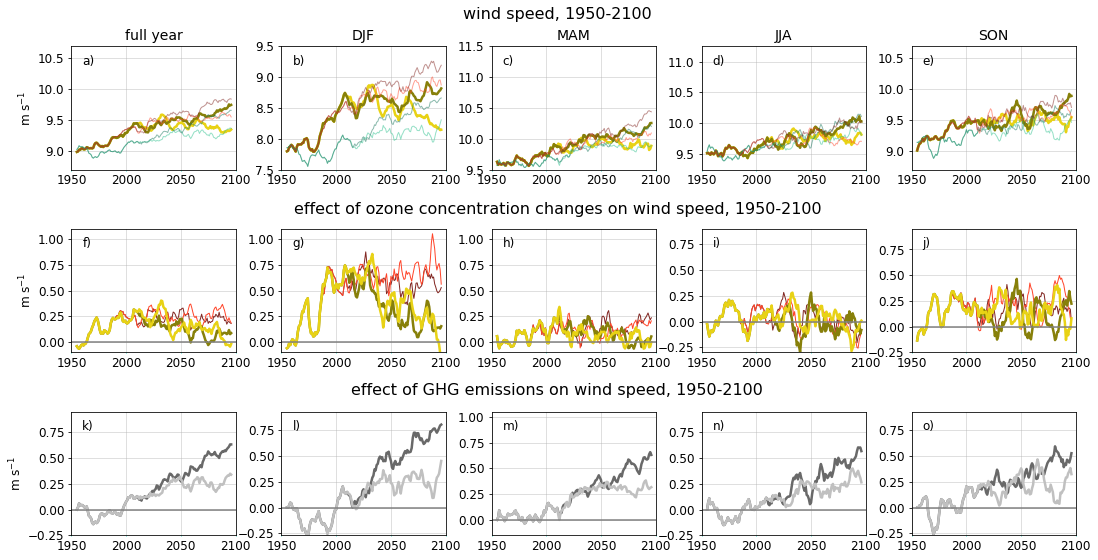

In [32]:
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

fact = 1
fig, axs = plt.subplots(3,5, figsize=(18*fact, 9*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']
lws = [2.5, 2.5, 1, 1, 1, 1]
talph = [1, 1, 0.5, 0.5, 0.5, 0.5]
wspd_2A_50 = wspd_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
wspd_2B_50 = wspd_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

wspdset_o3 = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1B-wspd_2B), (wspd_1A-wspd_2A)]
scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
scens_o3 = ['ozone depl.-fixed ozone \n (SSP 3-7.0)', 'ozone depl.-fixed ozone \n (SSP 1-2.6)',\
            'ozone rec .-fixed ozone \n (SSP 3-7.0)', 'ozone rec .-fixed ozone \n (SSP 1-2.6)']
lws_o3 = [1, 1, 2.5, 2.5]

cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']
cols_t = ['dimgrey', 'silver']
scens_t = ['fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 3-7.0)',\
           'fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 1-2.6)']


############## lines
tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])

for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = lws[x], alpha = talph[x], label = scendict[tsc]['name2'])
      
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = lws[x], alpha = talph[x], label = scendict[tsc]['name2'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth =  lws[x], alpha = talph[x], label = scendict[tsc]['name'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth  = lws[x], alpha = talph[x], label = scendict[tsc]['name'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[4], color = scendict[tsc]['color'], linewidth  = lws[x], alpha = talph[x])

##########################
# #### ozone effect

ind = 5
for x in range(0,4):
    tsc = scens_o3[x]
    wspd = wspdset_o3[x]
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols_o3[x], linewidth = lws_o3[x], alpha = 1, label = scens_o3[x])    
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols_o3[x], linewidth  = lws_o3[x], alpha = 1, label = scens_o3[x])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols_o3[x], linewidth  = lws_o3[x], alpha = 1, label = scens_o3[x])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols_o3[x], linewidth  = lws_o3[x], alpha = 1)
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[4+ind], color = cols_o3[x], linewidth  = lws_o3[x], alpha = 1)
    
# ######################
# #### temperature effect
ind = 10; tlw = 2.5
tv = wspd_2B[var].groupby('time_counter.year').mean()-\
wspd_2B_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[0+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[1+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'MAM')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])
    
tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'JJA')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[3+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'SON')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[4+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])    
    
tv = wspd_2A[var].groupby('time_counter.year').mean()-\
wspd_2A_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[0+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[1+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'MAM')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])
    
tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'JJA')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[3+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'SON')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[4+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])  
#############################################


##################
### titles, etc
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'wind speed, 1950-2100'
t2 = 'effect of ozone concentration changes on wind speed, 1950-2100'
t3 = 'effect of GHG emissions on wind speed, 1950-2100'
t4 = 'effect of ozone concentration changes and GHG emissions on wind speed, $\overline{2090-2100} - \overline{1950-1960}$'

fs = 16


for i in range(0,15):
    axs[i].tick_params(axis="x", direction="out", length=1, width=1, color="turquoise")
    axs[i].grid(alpha = 0.5)
    
for i in range(0,15):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xlabel('')
    
for i in range(1,15):
    axs[i].set_xlim([1950,2100])
    axs[i].set_ylabel('')
    
for i in range(0,15):
    #axs[i].set_xlim([1950,2100])
    #axs[i].set_ylabel('')
    axs[i].axhline(y=0, color = 'grey')
    
lab = ['a)','b)','c)','d)','e)',] 
ymi = np.array([8.7,7.5,9.5,9.25,8.7])  
hi = 2
for i in range(0,5):
    axs[i].set_ylim([ymi[i],ymi[i]+hi])
    axs[i].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['f)','g)','h)','i)','j)']  
ymi = np.array([-0.1,-0.1,-0.1,-0.3,-0.25])  
hi = 1.2
for i in range(0,5):
    axs[i+5].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+5].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['k)','l)','m)','n)','o)']  
ymi = np.array([-0.25,-0.27,-0.15,-0.25,-0.27])  
for i in range(0,5):
    axs[i+10].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+10].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['p)','q)','r)','s)','t)']  
ymi = np.array([-0.2,-0.2,-0.2,-0.2,-0.2])
hi = 1.1
# for i in range(0,5):
#     axs[i+15].set_ylim([ymi[i],ymi[i]+hi])
#     axs[i+15].set_xlim([0.7,6.5])
#     axs[i+15].text(1,ymi[i]+0.85*hi,lab[i])

tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i], fontsize = fs-2)
    
# axs[7].legend(fontsize = 8)
# axs[12].legend()
#plt.tight_layout()
#fig.savefig('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-windline.jpg')

plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'wind speed, 1950-2100'
t2 = 'effect of ozone concentration changes on wind speed, 1950-2100'
t3 = 'effect of GHG emissions on wind speed, 1950-2100'

axs[0].set_ylabel('m s$^{-1}$')
axs[5].set_ylabel('m s$^{-1}$')
axs[10].set_ylabel('m s$^{-1}$')


fs = 16
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
plt.figtext(0.5,0.94, t1, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.64, t2, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.36, t3, ha="center", va="top", fontsize=fs, color="k")
#plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")


fname = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-windforpres3.jpg'
fig.savefig(fname, transparent=None, dpi=250, format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None,
       )

Text(0.5, 1.0, 'GHG effect (m s$^{-1}$)')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


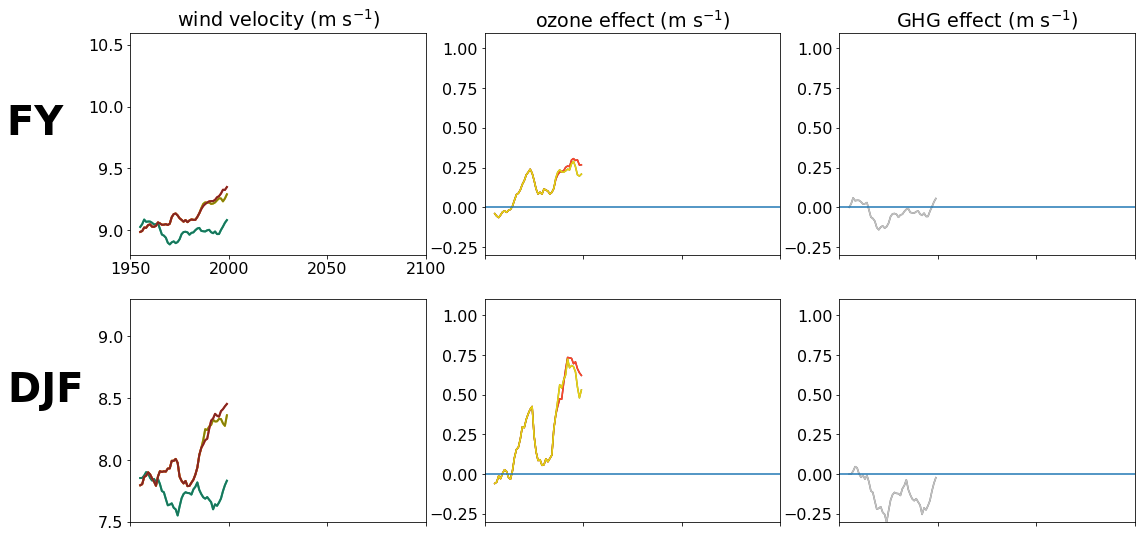

In [21]:
plt.rcParams.update({'font.size': 16})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 16}

plt.rc('font', **font)

fact = 1
fig, axs = plt.subplots(2,3, figsize=(18*fact, 9*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

wspd_2A_50 = wspd_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
wspd_2B_50 = wspd_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

wspdset_o3 = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1B-wspd_2B), (wspd_1A-wspd_2A)]


for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol = tv_rol[0:50]
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
      
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol = tv_rol[0:50]
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])

for x in range(0,4):
    tsc = scens_o3[x]
    wspd = wspdset_o3[x]
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol = tv_rol[0:50]
    tv_rol.plot(ax = axs[1], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])    
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol = tv_rol[0:50]
    tv_rol.plot(ax = axs[4], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])    
    
    
### temperature effect
tv = wspd_2B[var].groupby('time_counter.year').mean()-\
wspd_2B_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol = tv_rol[0:50]
tv_rol.plot(ax = axs[2], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol = tv_rol[0:50]
tv_rol.plot(ax = axs[5], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])
  
tv = wspd_2A[var].groupby('time_counter.year').mean()-\
wspd_2A_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol = tv_rol[0:50]
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol = tv_rol[0:50]
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[5], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])    
    

for i in range(0,6):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xticks(np.arange(1950,2150,50))
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].axhline(y=0)
    
for i in range(1,6):
    axs[i].set_xticklabels([])
    
axs[0].set_ylim([8.8,8.8+1.8])
axs[3].set_ylim([7.5,7.5+1.8])    
axs[1].set_ylim([-0.3,-0.2+1.3])
axs[4].set_ylim([-0.3,-0.2+1.3])     
axs[2].set_ylim([-0.3,-0.2+1.3])
axs[5].set_ylim([-0.3,-0.2+1.3])      

axs[0].set_ylabel('FY       ', rotation = -0, fontsize = 40, fontweight = 'bold')
axs[3].set_ylabel('DJF       ', rotation = -0, fontsize = 40, fontweight = 'bold')
axs[0].set_title('wind velocity (m s$^{-1}$)')
axs[1].set_title('ozone effect (m s$^{-1}$)')
axs[2].set_title('GHG effect (m s$^{-1}$)')



Text(0.5, 1.0, 'GHG effect (m s$^{-1}$)')

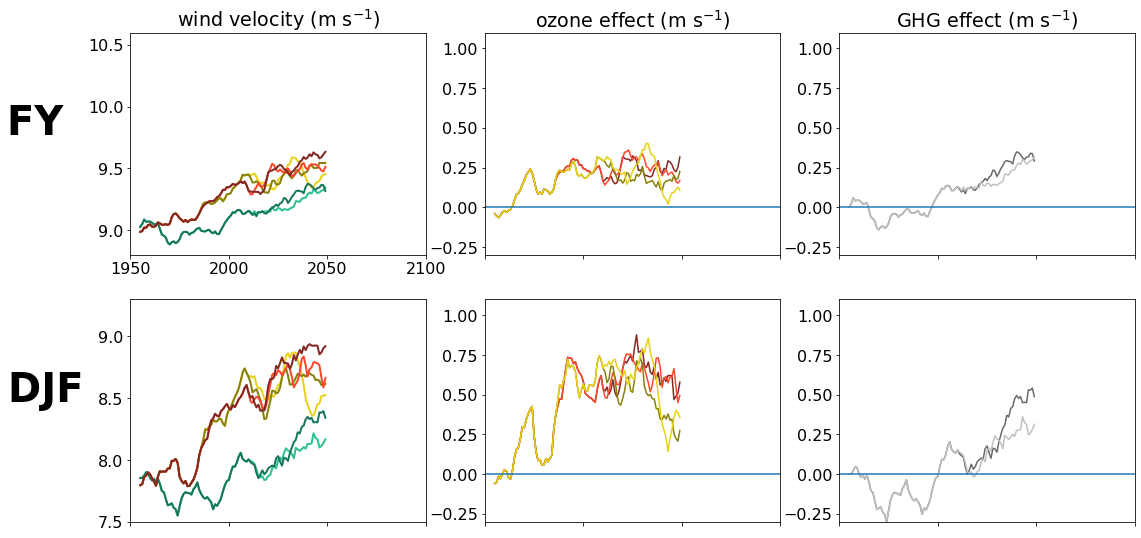

In [22]:
plt.rcParams.update({'font.size': 16})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 16}

plt.rc('font', **font)

fact = 1
fig, axs = plt.subplots(2,3, figsize=(18*fact, 9*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

wspd_2A_50 = wspd_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
wspd_2B_50 = wspd_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

wspdset_o3 = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1B-wspd_2B), (wspd_1A-wspd_2A)]


for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol = tv_rol[0:100]
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
      
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol = tv_rol[0:100]
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])

for x in range(0,4):
    tsc = scens_o3[x]
    wspd = wspdset_o3[x]
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol = tv_rol[0:100]
    tv_rol.plot(ax = axs[1], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])    
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol = tv_rol[0:100]
    tv_rol.plot(ax = axs[4], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])    
    
    
### temperature effect
tv = wspd_2B[var].groupby('time_counter.year').mean()-\
wspd_2B_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol = tv_rol[0:100]
tv_rol.plot(ax = axs[2], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol = tv_rol[0:100]
tv_rol.plot(ax = axs[5], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])
  
tv = wspd_2A[var].groupby('time_counter.year').mean()-\
wspd_2A_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol = tv_rol[0:100]
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol = tv_rol[0:100]
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[5], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])    
    

for i in range(0,6):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xticks(np.arange(1950,2150,50))
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].axhline(y=0)
    
for i in range(1,6):
    axs[i].set_xticklabels([])
    
axs[0].set_ylim([8.8,8.8+1.8])
axs[3].set_ylim([7.5,7.5+1.8])    
axs[1].set_ylim([-0.3,-0.2+1.3])
axs[4].set_ylim([-0.3,-0.2+1.3])     
axs[2].set_ylim([-0.3,-0.2+1.3])
axs[5].set_ylim([-0.3,-0.2+1.3])      

axs[0].set_ylabel('FY       ', rotation = -0, fontsize = 40, fontweight = 'bold')
axs[3].set_ylabel('DJF       ', rotation = -0, fontsize = 40, fontweight = 'bold')
axs[0].set_title('wind velocity (m s$^{-1}$)')
axs[1].set_title('ozone effect (m s$^{-1}$)')
axs[2].set_title('GHG effect (m s$^{-1}$)')



Text(0.5, 1.0, 'GHG effect (m s$^{-1}$)')

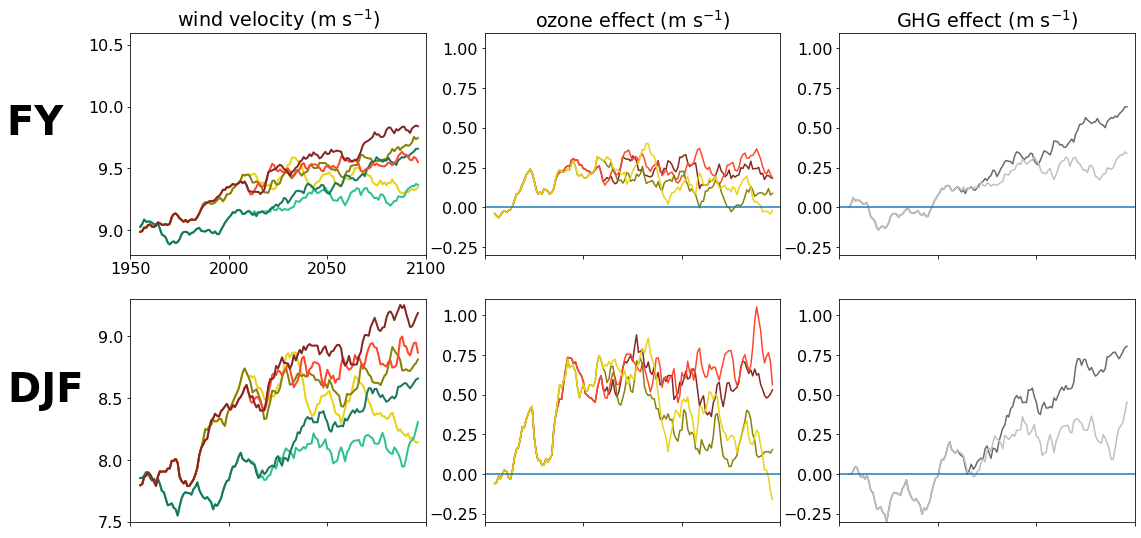

In [23]:
plt.rcParams.update({'font.size': 16})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 16}

plt.rc('font', **font)

fact = 1
fig, axs = plt.subplots(2,3, figsize=(18*fact, 9*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

wspd_2A_50 = wspd_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
wspd_2B_50 = wspd_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

wspdset_o3 = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1B-wspd_2B), (wspd_1A-wspd_2A)]


for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol = tv_rol[0:150]
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
      
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol = tv_rol[0:150]
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])

for x in range(0,4):
    tsc = scens_o3[x]
    wspd = wspdset_o3[x]
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol = tv_rol[0:150]
    tv_rol.plot(ax = axs[1], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])    
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol = tv_rol[0:150]
    tv_rol.plot(ax = axs[4], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])    
    
    
### temperature effect
tv = wspd_2B[var].groupby('time_counter.year').mean()-\
wspd_2B_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol = tv_rol[0:150]
tv_rol.plot(ax = axs[2], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol = tv_rol[0:150]
tv_rol.plot(ax = axs[5], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])
  
tv = wspd_2A[var].groupby('time_counter.year').mean()-\
wspd_2A_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol = tv_rol[0:150]
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol = tv_rol[0:150]
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[5], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])    
    

for i in range(0,6):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xticks(np.arange(1950,2150,50))
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].axhline(y=0)
    
for i in range(1,6):
    axs[i].set_xticklabels([])
    
axs[0].set_ylim([8.8,8.8+1.8])
axs[3].set_ylim([7.5,7.5+1.8])    
axs[1].set_ylim([-0.3,-0.2+1.3])
axs[4].set_ylim([-0.3,-0.2+1.3])     
axs[2].set_ylim([-0.3,-0.2+1.3])
axs[5].set_ylim([-0.3,-0.2+1.3])      

axs[0].set_ylabel('FY       ', rotation = -0, fontsize = 40, fontweight = 'bold')
axs[3].set_ylabel('DJF       ', rotation = -0, fontsize = 40, fontweight = 'bold')
axs[0].set_title('wind velocity (m s$^{-1}$)')
axs[1].set_title('ozone effect (m s$^{-1}$)')
axs[2].set_title('GHG effect (m s$^{-1}$)')



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


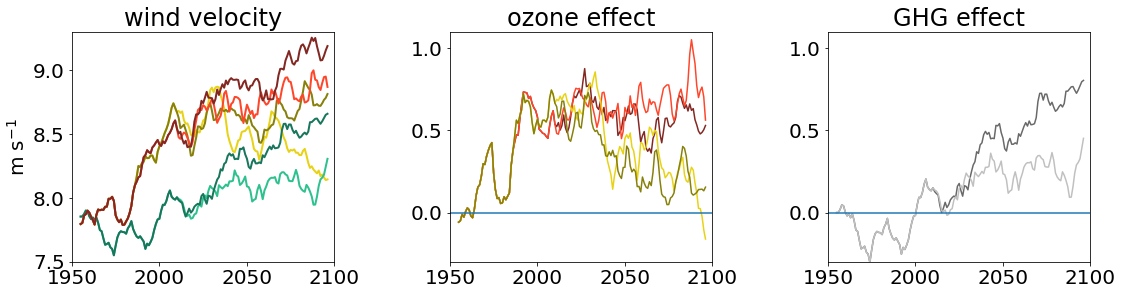

In [24]:
plt.rcParams.update({'font.size': 20})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 20}
plt.rc('font', **font)

elin = 150

fact = 1
fig, axs = plt.subplots(1,3, figsize=(16*fact, 4.5*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

wspd_2A_50 = wspd_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
wspd_2B_50 = wspd_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

wspdset_o3 = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1A-wspd_2A), (wspd_1B-wspd_2B), ]
scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
cols_o3 = ['#822722', '#FF462B', '#E8D215', '#87800A', ]
cols_t = ['dimgrey', 'silver']

for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    
#     tv = wspd[var].groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     tv_rol = tv_rol[0:50]
#     tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
      
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol = tv_rol[0:elin]
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])

for x in range(0,4):
    tsc = scens_o3[x]
    wspd = wspdset_o3[x]
#     tv = wspd[var].groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     tv_rol = tv_rol[0:50]
#     tv_rol.plot(ax = axs[1], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])    
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv_rol = tv_rol[0:elin]
    tv_rol.plot(ax = axs[1], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])    
    
    
# ### temperature effect
# tv = wspd_2B[var].groupby('time_counter.year').mean()-\
# wspd_2B_50[var].mean().values
# tv_rol = tv.rolling(year=10, center=True).mean()
# tv_rol = tv_rol[0:50]
# tv_rol.plot(ax = axs[2], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol = tv_rol[0:elin]
tv_rol.plot(ax = axs[2], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])
  
# tv = wspd_2A[var].groupby('time_counter.year').mean()-\
# wspd_2A_50[var].mean().values
# tv_rol = tv.rolling(year=10, center=True).mean()
# tv_rol = tv_rol[0:50]
# #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
# tv_rol.plot(ax = axs[2], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
tv_rol = tv_rol[0:elin]
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])    
    

for i in range(0,3):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xticks(np.arange(1950,2150,50))
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].axhline(y=0)
    
# for i in range(1,3):
#     axs[i].set_xticklabels([])
    
axs[0].set_ylim([8.8,8.8+1.8])
axs[0].set_ylim([7.5,7.5+1.8])    
axs[1].set_ylim([-0.3,-0.2+1.3])
axs[1].set_ylim([-0.3,-0.2+1.3])     
axs[2].set_ylim([-0.3,-0.2+1.3])
axs[2].set_ylim([-0.3,-0.2+1.3])     

axs[0].set_ylabel('m s$^{-1}$')
axs[0].set_title('wind velocity')
axs[1].set_title('ozone effect')
axs[2].set_title('GHG effect')

plt.tight_layout()

###

In [25]:
# wspd = wspd_3B
# wspd2 = wspd_3A

# w = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()

# w2 = wspd2.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()

def give_trends(ts_x,ts_y,ystart,yend):

    trend, h, mk_p, z, Tau, s, var_s, mk_slope, intercept = mk.original_test(ts_y)
    lin_slope, intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_p, lin_slope, lin_p

    
def give_summary_1950_2100(wspd, verbose = False):
    
    data = np.zeros([5,8])
    s_y = [1950,1950,2000,2050]
    e_y = [2100,2000,2050,2100]
    tseas = ['FY','DJF','MAM','JJA','SON']

    for y in range(0,4):
        for s in range(0,5):
            t1 = s_y[y]
            t2 = e_y[y]
            seas = tseas[s]

            if seas == 'FY':
                w = wspd.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))\
                .groupby('time_counter.year').mean()
            else:
                w = wspd.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-01-01'))
                w = w.sel(time_counter=(w['time_counter.season'] == seas)).groupby('time_counter.year').mean()

            mk_slope, mk_p, lin_slope, lin_p = give_trends(w.year,w,t1,t2)
            mk_slope = mk_slope*10 #decadal
            lin_slope = lin_slope*10 #decadal
            if mk_p > 0.05:
                mk_slope = -999
            if lin_p > 0.05:
                lin_slope = -999  
            if verbose:
                print(f'winds, {seas}, {t1}-{t2}, MK: {mk_slope}, lin: {lin_slope}')
            
            data[s,y*2] = mk_slope
            data[s,y*2+1] = lin_slope
        if verbose:
            print()
        
    df = pd.DataFrame(data, columns=['MK-1950-2100','lin-1950-2100',\
                                   'MK-1950-2000','lin-1950-2000',\
                                   'MK-2000-2050','lin-2000-2050',\
                                   'MK-2050-2100','lin-2050-2100',\
                                   ],\
              index  = ['FY','DJF','MAM', 'JJA', 'SON',])
    return df

df_1A = give_summary(wspd_1A)
print('')
print('1A')
print(df_1A)
df_2A = give_summary(wspd_2A)
print('')
print('2A')
print(df_2A)
df_3A = give_summary(wspd_3A)
print('')
print('3A')
print(df_3A)
df_1B = give_summary(wspd_1B)
print('')
print('1B')
print(df_1B)
df_2B = give_summary(wspd_2B)
print('')
print('2B')
print(df_2B)
df_3B = give_summary(wspd_3B)
print('')
print('3B')
print(df_3B)


NameError: name 'give_summary' is not defined

In [ ]:
# wspd = wspd_3B
# wspd2 = wspd_3A

# w = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()

# w2 = wspd2.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()

def give_trends(ts_x,ts_y,ystart,yend):

    trend, h, mk_p, z, Tau, s, var_s, mk_slope, intercept = mk.original_test(ts_y)
    lin_slope, intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_p, lin_slope, lin_p


#data = np.zeros([5,8])



    
def give_summary(wspd, verbose = False):
    
    data = np.zeros([5,10])
    s_y = [1950,1950,2000,2050]
    e_y = [2100,2000,2050,2100]
    
    s_y = [1940,1940,1980,2020,2060]
    e_y = [2100,1979,2019,2059,2099]
    tseas = ['FY','DJF','MAM','JJA','SON']

    for y in range(0,5):
        for s in range(0,5):
            t1 = s_y[y]
            t2 = e_y[y]
            seas = tseas[s]

            if seas == 'FY':
                w = wspd.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-12-31'))\
                .groupby('time_counter.year').mean()
            else:
                w = wspd.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-12-31'))
                w = w.sel(time_counter=(w['time_counter.season'] == seas)).groupby('time_counter.year').mean()

            mk_slope, mk_p, lin_slope, lin_p = give_trends(w.year,w,t1,t2)
            mk_slope = mk_slope*10 #decadal
            lin_slope = lin_slope*10 #decadal
            if mk_p > 0.05:
                mk_slope = -999
            if lin_p > 0.05:
                lin_slope = -999  
            if verbose:
                print(f'winds, {seas}, {t1}-{t2}, MK: {mk_slope}, lin: {lin_slope}')
            
            data[s,y*2] = mk_slope
            data[s,y*2+1] = lin_slope
        if verbose:
            print()
        
    df = pd.DataFrame(data, columns=['MK-1940-2100','lin-1940-2100',\
                                    'MK-1940-1980','lin-1940-1980',\
                                    'MK-1980-2020','lin-1980-2020',\
                                    'MK-2020-2060','lin-2020-2060',\
                                    'MK-2060-2100','lin-2060-2100',],\
              index  = ['FY','DJF','MAM', 'JJA', 'SON',])
    return df

df_1A = give_summary(wspd_1A)
print('')
print('1A')
print(df_1A)
df_2A = give_summary(wspd_2A)
print('')
print('2A')
print(df_2A)
df_3A = give_summary(wspd_3A)
print('')
print('3A')
print(df_3A)
df_1B = give_summary(wspd_1B)
print('')
print('1B')
print(df_1B)
df_2B = give_summary(wspd_2B)
print('')
print('2B')
print(df_2B)
df_3B = give_summary(wspd_3B)
print('')
print('3B')
print(df_3B)


In [ ]:
# wspd = wspd_3B
# wspd2 = wspd_3A

# w = wspd.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()

# w2 = wspd2.wspd10m.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()

def give_trends(ts_x,ts_y,ystart,yend):

    trend, h, mk_p, z, Tau, s, var_s, mk_slope, intercept = mk.original_test(ts_y)
    lin_slope, intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_p, lin_slope, lin_p


#data = np.zeros([5,8])



    
def give_summary(wspd, verbose = False):
    
    data = np.zeros([5,2])
    s_y = [1950,1950,2000,2050]
    e_y = [2100,2000,2050,2100]
    
    s_y = [2020]
    e_y = [2080]
    tseas = ['FY','DJF','MAM','JJA','SON']

    for y in range(0,1):
        for s in range(0,5):
            t1 = s_y[y]
            t2 = e_y[y]
            seas = tseas[s]

            if seas == 'FY':
                w = wspd.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-12-31'))\
                .groupby('time_counter.year').mean()
            else:
                w = wspd.wspd10m.sel(time_counter=slice(f'{t1}-01-01', f'{t2}-12-31'))
                w = w.sel(time_counter=(w['time_counter.season'] == seas)).groupby('time_counter.year').mean()

            mk_slope, mk_p, lin_slope, lin_p = give_trends(w.year,w,t1,t2)
            mk_slope = mk_slope*10 #decadal
            lin_slope = lin_slope*10 #decadal
            if mk_p > 0.05:
                mk_slope = -999
            if lin_p > 0.05:
                lin_slope = -999  
            if verbose:
                print(f'winds, {seas}, {t1}-{t2}, MK: {mk_slope}, lin: {lin_slope}')
            
            data[s,y*2] = mk_slope
            data[s,y*2+1] = lin_slope
        if verbose:
            print()
        
    df = pd.DataFrame(data, columns=['MK-2020-2100','lin-2020-2100'],\
              index  = ['FY','DJF','MAM', 'JJA', 'SON',])
    return df

df_1A = give_summary(wspd_1A)
print('')
print('1A')
print(df_1A)
df_2A = give_summary(wspd_2A)
print('')
print('2A')
print(df_2A)
df_3A = give_summary(wspd_3A)
print('')
print('3A')
print(df_3A)
df_1B = give_summary(wspd_1B)
print('')
print('1B')
print(df_1B)
df_2B = give_summary(wspd_2B)
print('')
print('2B')
print(df_2B)
df_3B = give_summary(wspd_3B)
print('')
print('3B')
print(df_3B)


# spatial mann-kendall;

# 5 x 7 wind trends 1950-2100 and 2020-2100



In [ ]:
extract = False



def make_mkspat(tscen,ylist_UKESM):

    savenam = f'/gpfs/data/greenocean/software/products/windsFromComponents/MannKendall/UKESM_{tscen}_MK-1950-2100.nc'
    print(savenam)

    UKESM_DJF = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'DJF')).\
    groupby('time_counter.year').mean().values
    UKESM_MAM = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'MAM')).\
    groupby('time_counter.year').mean().values
    UKESM_JJA = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'JJA')).\
    groupby('time_counter.year').mean().values
    UKESM_SON = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'SON')).\
    groupby('time_counter.year').mean().values
    UKESM_FY = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).\
    groupby('time_counter.year').mean().values
    np.shape(UKESM_FY)

    w = time.time()

    tdats = [UKESM_FY, UKESM_DJF, UKESM_MAM,UKESM_JJA, UKESM_SON]

    mk_slope = np.zeros([5,60,360])
    mk_p = np.zeros([5,60,360])

    for sc in range(0,5):
        testdat = tdats[sc]
        print(sc)
        for i in range(0,60):
            if i%20 == 0:
                print(i)
            for j in range(0,360):
                tda = testdat[:,i,j]
                trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(tda)
                mk_slope[sc,i,j] = slope
                mk_p[sc,i,j] = p

    data_vars = {'mk_slope':(['season', 'lat', 'lon'], mk_slope,
    {'long_name':'MK, 1950-2100'}),
                 'mk_p':(['season', 'lat', 'lon'], mk_p,
    {'long_name':'MK, 1950-2100'}),
    }

    lats = ylist_UKESM.lat.isel(lat = slice(0,60)).values
    lons = ylist_UKESM.lon.values
    seasons = ['FY','DJF','MAM','JJA','SON']
    # define coordinates
    coords = {'season': (['season'], seasons),
            'lat': (['lat'], lats),
    'lon': (['lon'], lons),
             }
    # define global attributes
    attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb',
    'desc': ''
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)

    w2 = time.time()
    print(w2-w)

    return ds

if extract:
    
    ylist_UKESM_1A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '1A'))
    ylist_UKESM_2A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '2A'))
    ylist_UKESM_3A = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '3A'))
    ylist_UKESM_1B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '1B'))
    ylist_UKESM_2B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '2B'))
    ylist_UKESM_3B = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, '3B'))
    ylist_UKESM_PI = xr.open_mfdataset(make_yearlist_UKESM(1950,2100, 'PI'))
    
#     ds = make_mkspat('1A',ylist_UKESM_1A)
#     ds = make_mkspat('2A',ylist_UKESM_2A)
#     ds = make_mkspat('3A',ylist_UKESM_3A)
#     ds = make_mkspat('1B',ylist_UKESM_1B)
#     ds = make_mkspat('2B',ylist_UKESM_2B)
#     ds = make_mkspat('3B',ylist_UKESM_3B)
    ds = make_mkspat('PI',ylist_UKESM_PI)

In [ ]:
extract = True


def make_mkspat(tscen,ylist_UKESM):

    savenam = f'/gpfs/data/greenocean/software/products/windsFromComponents/MannKendall/UKESM_{tscen}_MK-2020-2100.nc'
    print(savenam)

    UKESM_DJF = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'DJF')).\
    groupby('time_counter.year').mean().values
    UKESM_MAM = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'MAM')).\
    groupby('time_counter.year').mean().values
    UKESM_JJA = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'JJA')).\
    groupby('time_counter.year').mean().values
    UKESM_SON = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).sel(time_counter=(ylist_UKESM['time_counter.season'] == 'SON')).\
    groupby('time_counter.year').mean().values
    UKESM_FY = ylist_UKESM.wspd10m.isel(lat=slice(0,60)).\
    groupby('time_counter.year').mean().values
    np.shape(UKESM_FY)

    w = time.time()

    tdats = [UKESM_FY, UKESM_DJF, UKESM_MAM,UKESM_JJA, UKESM_SON]

    mk_slope = np.zeros([5,60,360])
    mk_p = np.zeros([5,60,360])

    for sc in range(0,5):
        testdat = tdats[sc]
        print(sc)
        for i in range(0,60):
            if i%20 == 0:
                print(i)
            for j in range(0,360):
                tda = testdat[:,i,j]
                trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(tda)
                mk_slope[sc,i,j] = slope
                mk_p[sc,i,j] = p

    data_vars = {'mk_slope':(['season', 'lat', 'lon'], mk_slope,
    {'long_name':'MK, 2020-2100'}),
                 'mk_p':(['season', 'lat', 'lon'], mk_p,
    {'long_name':'MK, 2020-2100'}),
    }

    lats = ylist_UKESM.lat.isel(lat = slice(0,60)).values
    lons = ylist_UKESM.lon.values
    seasons = ['FY','DJF','MAM','JJA','SON']
    # define coordinates
    coords = {'season': (['season'], seasons),
            'lat': (['lat'], lats),
    'lon': (['lon'], lons),
             }
    # define global attributes
    attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/Fig-line-windeffect.ipynb',
    'desc': ''
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)

    w2 = time.time()
    print(w2-w)

    return ds

if extract:
    
    ylist_UKESM_1A = xr.open_mfdataset(make_yearlist_UKESM(2020,2100, '1A'))
    ylist_UKESM_2A = xr.open_mfdataset(make_yearlist_UKESM(2020,2100, '2A'))
    ylist_UKESM_3A = xr.open_mfdataset(make_yearlist_UKESM(2020,2100, '3A'))
    ylist_UKESM_1B = xr.open_mfdataset(make_yearlist_UKESM(2020,2100, '1B'))
    ylist_UKESM_2B = xr.open_mfdataset(make_yearlist_UKESM(2020,2100, '2B'))
    ylist_UKESM_3B = xr.open_mfdataset(make_yearlist_UKESM(2020,2100, '3B'))
    ylist_UKESM_PI = xr.open_mfdataset(make_yearlist_UKESM(2020,2100, 'PI'))

    
#     ds = make_mkspat('1A',ylist_UKESM_1A)
#     ds = make_mkspat('2A',ylist_UKESM_2A)
#     ds = make_mkspat('3A',ylist_UKESM_3A)
#     ds = make_mkspat('1B',ylist_UKESM_1B)
#     ds = make_mkspat('2B',ylist_UKESM_2B)
#     ds = make_mkspat('3B',ylist_UKESM_3B)
    ds = make_mkspat('PI',ylist_UKESM_PI)

In [ ]:
tdir = '/gpfs/data/greenocean/software/products/windsFromComponents/MannKendall/'

s1A_2020 = xr.open_dataset(f'{tdir}UKESM_1A_MK-2020-2100.nc')
s1B_2020 = xr.open_dataset(f'{tdir}UKESM_1B_MK-2020-2100.nc')
s2A_2020 = xr.open_dataset(f'{tdir}UKESM_2A_MK-2020-2100.nc')
s2B_2020 = xr.open_dataset(f'{tdir}UKESM_2B_MK-2020-2100.nc')
s3A_2020 = xr.open_dataset(f'{tdir}UKESM_3A_MK-2020-2100.nc')
s3B_2020 = xr.open_dataset(f'{tdir}UKESM_3B_MK-2020-2100.nc')
sPI_2020 = xr.open_dataset(f'{tdir}UKESM_PI_MK-2020-2100.nc')

s1A_1950 = xr.open_dataset(f'{tdir}UKESM_1A_MK-1950-2100.nc')
s1B_1950 = xr.open_dataset(f'{tdir}UKESM_1B_MK-1950-2100.nc')
s2A_1950 = xr.open_dataset(f'{tdir}UKESM_2A_MK-1950-2100.nc')
s2B_1950 = xr.open_dataset(f'{tdir}UKESM_2B_MK-1950-2100.nc')
s3A_1950 = xr.open_dataset(f'{tdir}UKESM_3A_MK-1950-2100.nc')
s3B_1950 = xr.open_dataset(f'{tdir}UKESM_3B_MK-1950-2100.nc')
sPI_1950 = xr.open_dataset(f'{tdir}UKESM_PI_MK-1950-2100.nc')



In [ ]:
s3B_1950

In [ ]:
def plot_southern(fig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, tticks, fs = 12, 
                  tit = '', cbarlab = '', tcmap = 'viridis', lm = True, cbr = True):
   
    ax1.set_extent([-180, 180, -80, -28], ccrs.PlateCarree())
    #make that circle
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax1.set_boundary(circle, transform=ax1.transAxes)
    # lons = nav_lon[0:50,:]; lats = nav_lat[0:50,:]; 
    mesh = ax1.pcolormesh(lons, lats, tdat, cmap = tcmap, vmin = tvmin, vmax = tvmax, 
                     transform=ccrs.PlateCarree())
    
    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                                 edgecolor='face', facecolor='k'))

    ax1.set_title(tit, fontsize = fs)
    cb = 0
    if cbr:
        cb = fig.colorbar(mesh, ax = ax1, orientation = 'horizontal',
                     pad = 0.06, fraction = 0.045, shrink = 0.9)
        cb.set_label(label=cbarlab,fontsize = 8)
        cb.set_ticks(tticks, fontsize = 80)
        cb.ax.tick_params(labelsize=8)
    return cb


In [ ]:
def plot_mk_with_sigmask(fig, ax1, mk_slope, mk_p, tmi = -0.3, tma = 0.3):
    tmi = tmi; tma = tma
    mk_slop_sig2 =np.copy(mk_slope)
    mk_slop_sig2[mk_p>0.05] = 1 ##will be coloured grey when insignificant
    mk_slop_sig2[mk_p<=0.05] = np.nan ## will be transparent, and original trend value will shine through
    bc = plot_southern(fig, ax1, lons, lats[0:60], mk_slope*10, tmi, tma, np.arange(tmi,tma+0.05,0.1), fs = 12, 
                  tit = 'mk_slope', cbarlab = 'm/s', tcmap = cm.balance, lm = True, cbr = True)
    tmi = -0.3; tma = 20
    bc = plot_southern(fig, ax1, lons, lats[0:60], mk_slop_sig2*10, tmi, tma, np.arange(tmi,tma+0.05,0.1), fs = 12, 
                 cbarlab = 'm/s', tcmap = cm.gray, lm = True, cbr = False)
    
fact = 0.25
fig = plt.figure(figsize=[77*fact, 77*fact])
tmi = -0.3; tma = 0.3

ind = 0; seas = 'full year'

scens = [sPI_2020, s2A_2020, s1A_2020, s3A_2020, s2B_2020, s1B_2020, s3B_2020]


titsc = ['Preind', 'Fixed Ozone  \n Low Temp', 'Hist. Ozone, \n Low Temp', '1990 Ozone \n Low Temp',\
         'Fixed Ozone \n High Temp', 'Hist. Ozone \n High Temp', '1990 Ozone \n High Temp']

seas = ['FY', 'DJF', 'MAM', 'JJA', 'SON']

lats = sPI_2020.lat
lons = sPI_2020.lon

ind = 1
for s in range(0,5):
    for sc in range(0,7):
        scen = scens[sc]
        ax1 = fig.add_subplot(5, 7, ind, projection=ccrs.Orthographic(0, -90))
        plot_mk_with_sigmask(fig, ax1, scen.mk_slope[s,:,:], scen.mk_p[s,:,:], tmi, tma)
        tit = f'{titsc[sc]} {seas[s]}'
        ax1.set_title(tit)
        ind = ind+1

# plt.tight_layout()


In [ ]:
def plot_mk_with_sigmask(fig, ax1, mk_slope, mk_p, tmi = -0.3, tma = 0.3):
    tmi = tmi; tma = tma
    mk_slop_sig2 =np.copy(mk_slope)
    mk_slop_sig2[mk_p>0.05] = 1 ##will be coloured grey when insignificant
    mk_slop_sig2[mk_p<=0.05] = np.nan ## will be transparent, and original trend value will shine through
    bc = plot_southern(fig, ax1, lons, lats[0:60], mk_slope*10, tmi, tma, np.arange(tmi,tma+0.05,0.1), fs = 12, 
                  tit = 'mk_slope', cbarlab = 'm/s', tcmap = cm.balance, lm = True, cbr = True)
    tmi = -0.3; tma = 20
    bc = plot_southern(fig, ax1, lons, lats[0:60], mk_slop_sig2*10, tmi, tma, np.arange(tmi,tma+0.05,0.1), fs = 12, 
                 cbarlab = 'm/s', tcmap = cm.gray, lm = True, cbr = False)
    
fact = 0.25
fig = plt.figure(figsize=[77*fact, 77*fact])
tmi = -0.3; tma = 0.3

ind = 0; seas = 'full year'

scens = [sPI_1950, s2A_1950, s1A_1950, s3A_1950, s2B_1950, s1B_1950, s3B_1950]


titsc = ['Preind', 'Fixed Ozone  \n Low Temp', 'Hist. Ozone, \n Low Temp', '1990 Ozone \n Low Temp',\
         'Fixed Ozone \n High Temp', 'Hist. Ozone \n High Temp', '1990 Ozone \n High Temp']

seas = ['FY', 'DJF', 'MAM', 'JJA', 'SON']

lats = sPI_1950.lat
lons = sPI_1950.lon

ind = 1
for s in range(0,5):
    for sc in range(0,7):
        scen = scens[sc]
        ax1 = fig.add_subplot(5, 7, ind, projection=ccrs.Orthographic(0, -90))
        plot_mk_with_sigmask(fig, ax1, scen.mk_slope[s,:,:], scen.mk_p[s,:,:], tmi, tma)
        tit = f'{titsc[sc]} {seas[s]}'
        ax1.set_title(tit)
        ind = ind+1

# plt.tight_layout()
